# 二维Kmeans 

## 1 导入数据 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.io import loadmat

In [2]:
mat = loadmat("./data/ex7data2.mat")
X = mat['X']
X.shape

(300, 2)

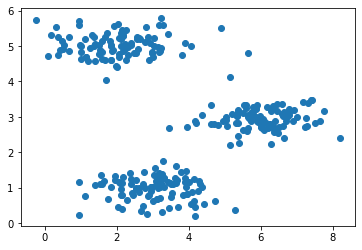

In [3]:
plt.plot(X[:,0], X[:,1], 'o')

## 2 KMeans 

In [4]:
#Visualizing the data
def plotData(myX,mycentroids,myidxs = None):

    """
    Fucntion to plot the data and color it accordingly.
    myidxs should be the latest iteraction index vector
    mycentroids should be a vector of centroids, one per iteration
    """
    
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
    
    assert myX[0].shape == mycentroids[0][0].shape
    assert mycentroids[-1].shape[0] <= len(colors)

    #If idxs is supplied, divide up X into colors
    if myidxs is not None:
        assert myidxs.shape[0] == myX.shape[0]
        subX = []
        for x in range(mycentroids[0].shape[0]):
            subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    else:
        subX = [myX]
        
    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0],newX[:,1],'o',color=colors[x],
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)

    #绘制聚类中心移动轨迹
    tempx, tempy = [], []
    for mycentroid in mycentroids:
        tempx.append(mycentroid[:,0])
        tempy.append(mycentroid[:,1])
    
    for x in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)
    leg = plt.legend(loc=4, framealpha=0.5)

In [5]:
#从样本中提取k个样本出来
def random_init(data, k):
    import time
    r = np.random.RandomState(int(time.time()))
    return data[np.random.randint(0, len(data), k)]

k = 3
centroids = random_init(X, k)
centroids

array([[2.05288518, 4.77958559],
       [2.59148642, 4.92593394],
       [6.11768055, 2.85475655]])

In [6]:

#计算每个样本到所有聚类中心的距离
def dist(X, centroids):
    d = X.reshape(-1, 1, X.shape[-1]) - centroids
    d = (d * d).sum(axis=2)
    return d

In [7]:
def K_means(X, k, centroids=None, epoches=10):
    if centroids is None:
        centroids = random_init(X, k)
    centroids_history = [centroids]
    cost = []
    m = len(X)
    c = None
    for i in range(epoches):
        # 先找到每一个样本的最近簇中心点
        d = dist(X, centroids)
        # c是簇中心值
        c = d.argmin(axis=1)
        # md是每个样本到簇中心的距离
        md = d.min(axis=1)
        # KMeans的损失函数值
        cost.append(md.sum() / m)
        
        # 更新簇中心位置
        new_centroids = np.empty_like(centroids)
        for i in range(k):        
            #选出第i类的所有样本
            kX = X[c == i]
            #更新簇中心所在位置
            new_centroids[i] = kX.mean(axis=0)
            
        centroids_history.append(new_centroids)
        centroids = new_centroids
    return c, centroids_history, cost

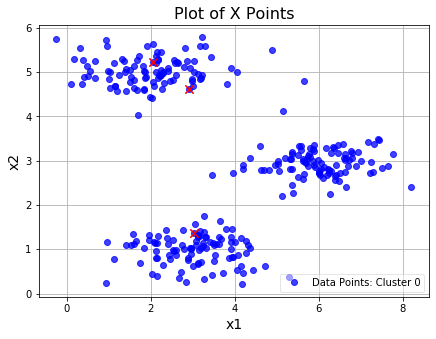

In [8]:
centroids = random_init(X, k)
plotData(X, [centroids])

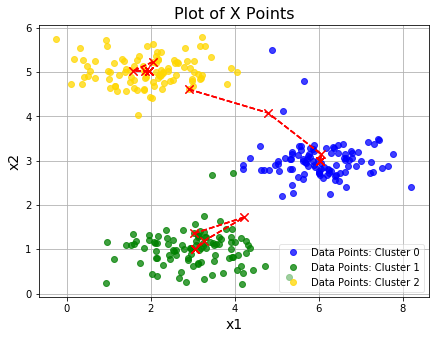

In [9]:
c, hist, cost = K_means(X, k, centroids)
plotData(X, hist, c)

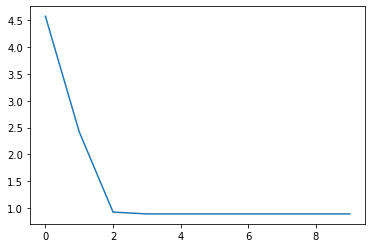

In [10]:
plt.plot(list(range(len(cost))), cost)

In [11]:
def best_KMeans(X, k, times=10, epoches=10):
    best_c = None
    best_hist = None
    best_cost = None
    min_cost = 99999999.
    for i in range(times):
        c, hist, cost = K_means(X, k, None, epoches)
        if cost[-1] < min_cost:
            min_cost = cost[-1]
            best_cost = cost
            best_hist = hist
            best_c = c
    return best_c, best_hist, best_cost

Wall time: 175 ms


D:\Software\Miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
D:\Software\Miniconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


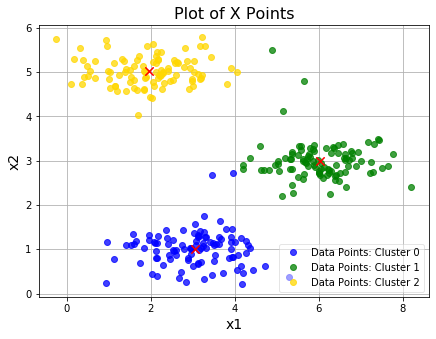

In [12]:
%%time
c, hist, cost = best_KMeans(X, k, 100, 5)
plotData(X, [hist[-1]], c)

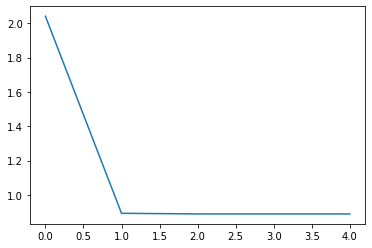

In [13]:
plt.plot(list(range(len(cost))), cost)

## 3 用sklearn的KMeans 

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

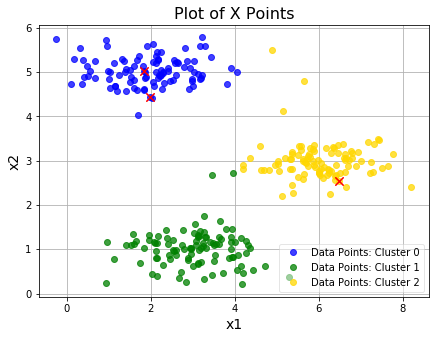

In [16]:
c = kmeans.predict(X)
plotData(X, [random_init(X, k)], c)

## 3 用KMeans压缩图片 

In [17]:
from skimage.io import imread

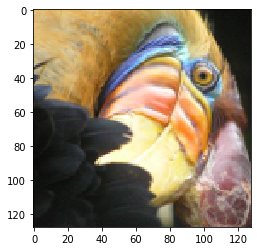

In [18]:
im = imread("./data/bird_small.png")
plt.imshow(im)

In [19]:
X = im / 255
X = X.reshape(-1, 3)

In [20]:
X.shape

(16384, 3)

In [30]:
k = 16
c, hist, cost = best_KMeans(X, k)

In [31]:
final_im = hist[-1][c]
final_im.shape

(16384, 3)

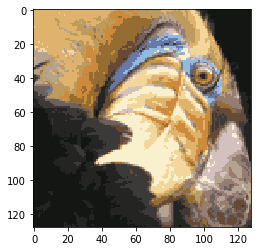

In [32]:
plt.imshow(final_im.reshape((128, 128, 3)))

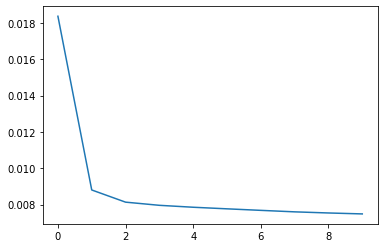

In [33]:
plt.plot(list(range(len(cost))), cost)